In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_lv = pd.read_csv("lv_results_cross_validation.csv")
df_cd_hit = pd.read_csv("lv_results_cd_hit.csv")
df_mmseq = pd.read_csv("benchmark_results_mmseqs_custom_cleaned.csv")

In [3]:
df_mmseq["source"] = df_cd_hit["source"]

In [4]:
# Merge df_lv and df_cd_hit on the "source" column (inner join).
# Change how='inner' to 'outer'/'left'/'right' as needed.
df_merged = pd.merge(df_lv, df_cd_hit, on='source', how='inner', suffixes=('_lv', '_cdhit'))
df_merged_final = pd.merge(df_merged, df_mmseq, on='source', how='inner', suffixes=('_merged', '_mmseq'))
df_merged_final = df_merged_final.drop(columns=["query", "database"])
df_merged_final = df_merged_final.rename(columns={
    "times": "times_lv",
    "time": "times_cdhit",
    "time_sec": "times_mmseq",
    "deviation": "deviation_lv",
    "mean_bitscore": "value_mmseq",
    "coverage_merged": "coverage_cdhit",
})

df_merged_final

,source,value_lv,deviation_lv,times_lv,value_cdhit,times_cdhit,coverage_cdhit,times_mmseq,value_mmseq,coverage_mmseq
0,positives,0.581212,0.031274,31.147791,0.666810,3.519611,0.304063,3.272836,0.242013,0.294224
1,positives_hq,1.000000,NaN,7.758370,1.000000,0.990269,0.295906,0.010845,1.000000,1.000000
2,negatives,0.355321,0.012224,31.027677,0.289916,9.087318,0.773525,3.168252,0.005839,0.015863
3,random_uniform,0.316844,0.000190,118.209645,0.390693,31.475786,0.835020,11.213933,0.008877,0.028240
4,random_standard,0.367722,0.004352,117.260735,0.434471,27.700939,0.781800,6.390595,0.013519,0.038800
5,UniProt,0.325625,0.000189,121.576738,0.416980,33.937083,0.915860,7.711446,0.008013,0.027620
6,AMP-Diffusion,0.436102,0.003346,111.461431,0.515578,24.611037,0.661555,6.680897,0.175587,0.278681
7,AMP-GAN,0.419296,0.000352,116.336906,0.463361,26.295559,0.693360,5.706215,0.024002,0.061980
8,CPL-Diff,0.532909,0.000692,101.396660,0.535495,19.303415,0.567347,3.914666,0.069497,0.127589
9,HydrAMP,0.404823,0.000400,118.140457,0.456780,43.177930,0.807340,5.217616,0.010396,0.024440


In [5]:
df_merged_final.to_csv("combined_similarity_results_final.csv", index=False)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df_models = pd.read_csv("combined_similarity_results_models.csv")
df_models

,source,value_lv,deviation_lv,times_lv,value_cdhit,times_cdhit,coverage_cdhit,times_mmseq,value_mmseq,coverage_mmseq
0,AMP-Diffusion,0.436102,0.003346,111.461431,0.515578,24.611037,0.661555,6.680897,0.175587,0.278681
1,AMP-GAN,0.419296,0.000352,116.336906,0.463361,26.295559,0.693360,5.706215,0.024002,0.061980
2,CPL-Diff,0.532909,0.000692,101.396660,0.535495,19.303415,0.567347,3.914666,0.069497,0.127589
3,HydrAMP,0.404823,0.000400,118.140457,0.456780,43.177930,0.807340,5.217616,0.010396,0.024440
4,OmegAMP,0.516065,0.001109,117.666822,0.577545,17.085453,0.477760,4.728704,0.165382,0.207440
5,AMP-LM,0.518957,0.023561,54.689387,0.505566,12.907256,0.717042,3.403320,0.216846,0.334739
6,negatives_hq,0.624050,NaN,2.380996,0.484778,0.521577,0.499459,2.660107,0.350979,0.429189
7,AMP-Muller,0.623581,NaN,2.475983,0.407505,0.523434,0.382129,2.609867,0.447791,0.578897


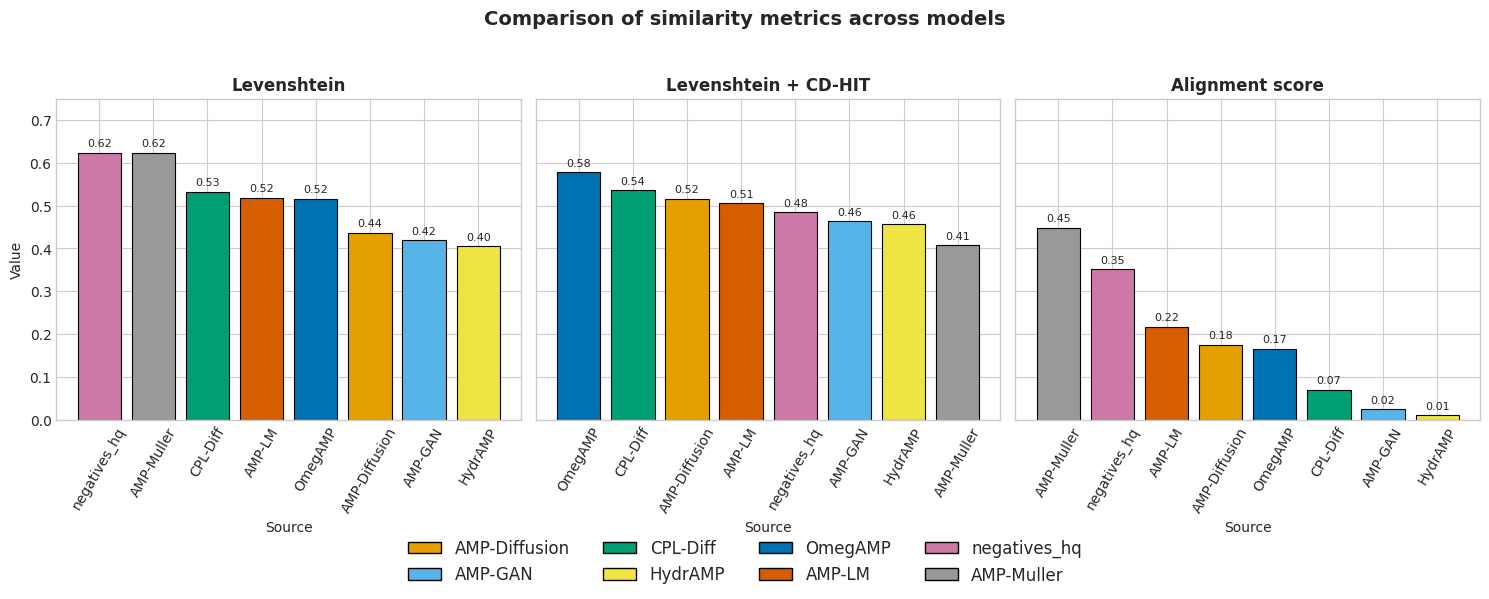

In [10]:
colors = [
    "#E69F00", "#56B4E9", "#009E73", "#F0E442",
    "#0072B2", "#D55E00", "#CC79A7", "#999999"
]
color_map = dict(zip(df_models["source"], colors))

# Define plotting parameters
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

metrics = [
    ("value_lv", "Levenshtein"),
    ("value_cdhit", "Levenshtein + CD-HIT"),
    ("value_mmseq", "Alignment score")
]

# Loop through subplots
for ax, (col, title) in zip(axes, metrics):
    df_sorted = df_models.sort_values(by=col, ascending=False)

    # Apply consistent colors by source
    bar_colors = [color_map[src] for src in df_sorted["source"]]

    bars = ax.bar(df_sorted["source"], df_sorted[col],
                  color=bar_colors, edgecolor='black', linewidth=0.8)

    # Annotate values on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
                ha='center', va='bottom', fontsize=8)

    # Titles and labels
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel("Source", fontsize=10)
    ax.tick_params(axis='x', rotation=60)
    ax.set_ylim(0, 0.75)

axes[0].set_ylabel("Value", fontsize=10)
fig.suptitle("Comparison of similarity metrics across models", fontsize=14, fontweight='bold')

# Create a unified legend
handles = [plt.Rectangle((0,0),1,1, color=color_map[src], ec='black') for src in df_models["source"]]
fig.legend(handles, df_models["source"], title="", loc='lower center',
           ncol=4, fontsize=12, title_fontsize=10, frameon=False)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.savefig("barplot_comparison_colored.png", dpi=300, bbox_inches='tight')
plt.show()

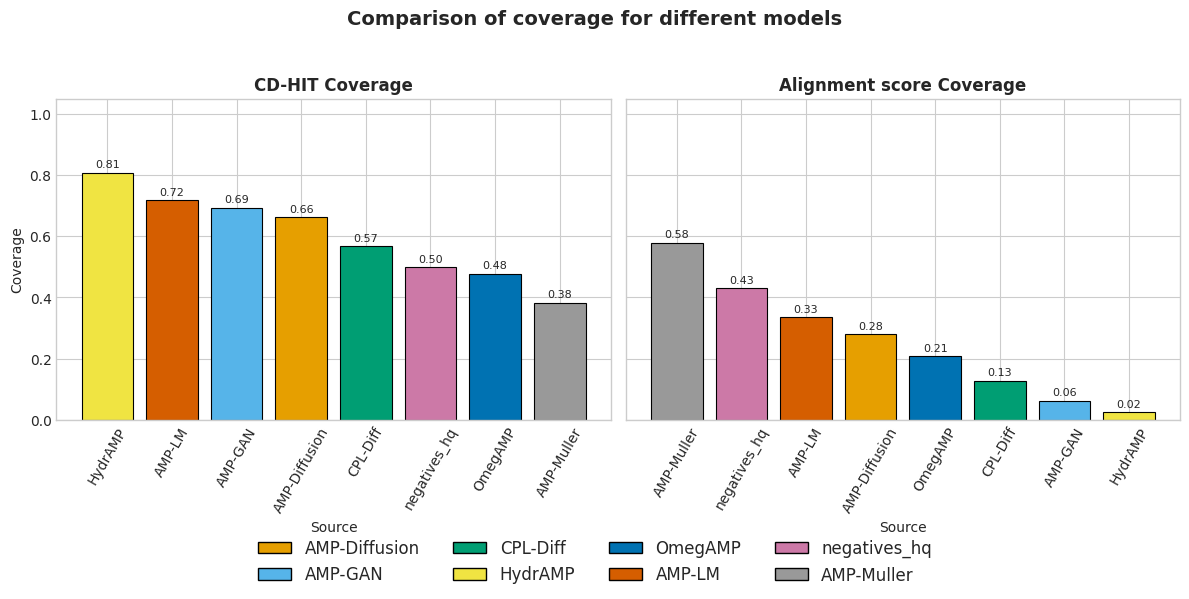

In [11]:
colors = [
    "#E69F00", "#56B4E9", "#009E73", "#F0E442",
    "#0072B2", "#D55E00", "#CC79A7", "#999999"
]
color_map = dict(zip(df_models["source"], colors))

# Plot style
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

metrics = [
    ("coverage_cdhit", "CD-HIT Coverage"),
    ("coverage_mmseq", "Alignment score Coverage")
]

# Loop over both plots
for ax, (col, title) in zip(axes, metrics):
    df_sorted = df_models.sort_values(by=col, ascending=False)

    # Consistent colors per source
    bar_colors = [color_map[src] for src in df_sorted["source"]]

    bars = ax.bar(df_sorted["source"], df_sorted[col],
                  color=bar_colors, edgecolor='black', linewidth=0.8)

    # Annotate each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
                ha='center', va='bottom', fontsize=8)

    # Titles and formatting
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel("Source", fontsize=10)
    ax.tick_params(axis='x', rotation=60)
    ax.set_ylim(0, 1.05)

axes[0].set_ylabel("Coverage", fontsize=10)
fig.suptitle("Comparison of coverage for different models", fontsize=14, fontweight='bold')

# Unified legend below
handles = [plt.Rectangle((0,0),1,1, color=color_map[src], ec='black') for src in df_models["source"]]
fig.legend(handles, df_models["source"], title="", loc='lower center',
           ncol=4, fontsize=12, title_fontsize=10, frameon=False)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.savefig("coverage_barplots.png", dpi=300, bbox_inches='tight')
plt.show()